In [85]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys
from ipywidgets import widgets
from IPython.display import display, HTML
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Customized modules
HOME = '/home/serinatan/project/GPU-Virtualization-Benchmarks/util'
if HOME not in sys.path:
    sys.path.append(HOME)

import data.scripts.common.format as fmt
import data.scripts.common.constants as const
import data.scripts.gen_tables.gen_pair_configs as gen_pair

SCRIPT_PATH = os.path.join(HOME, 'data/scripts') 
PKL_PATH = os.path.join(HOME, 'data/pickles') 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
def draw_table(df, cols, hide_index=True):
    if hide_index:
        return df[cols].style.set_table_styles(fmt.table_style).hide_index()
    else:
        return df[cols].style.set_table_styles(fmt.table_style)

# Pair - dynamic

In [77]:
gen_pair = os.path.join(SCRIPT_PATH, 'gen_tables/gen_table_pair.py')
baseline = 'seq'
seq_pkl = os.path.join(PKL_PATH, 'seq.pkl')
intra_pkl = os.path.join(PKL_PATH, 'intra.pkl')
csv = os.path.join(HOME, 'data/csv/pair_dynamic.csv')
output = os.path.join(PKL_PATH, 'pair_dynamic_seq.pkl')

%run $gen_pair --csv $csv --output $output --seq_pkl $seq_pkl --intra_pkl $intra_pkl 

In [100]:
df_dynamic = pd.read_pickle(output)
df_dynamic.sort_values(['1_bench', '2_bench'], inplace=True)
df_dynamic.reset_index(inplace=True, drop=True)

# FIXME: drop any rows with zero fairness
df_dynamic = df_dynamic[df_dynamic['fairness'] > 0]

fairness v.s. diff_mflat: (-0.3367294759385811, 3.0430132544785984e-05)


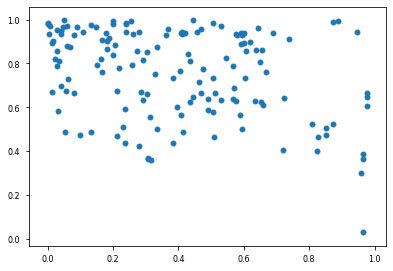

In [105]:

# correlation btw fairness and diff_mflat
df_dynamic['sum_mflat'] = df_dynamic['avg_mem_lat_x'] + df_dynamic['avg_mem_lat_y']
print('fairness v.s. diff_mflat:',
      scipy.stats.pearsonr(df_dynamic['diff_mflat']/df_dynamic['sum_mflat'], df_dynamic['fairness']))
plt.scatter(df_dynamic['diff_mflat']/df_dynamic['sum_mflat'], df_dynamic['fairness'])
plt.show()

ipc error v.s. sum_dram (0.6059883457641146, 4.2055418166307896e-16)


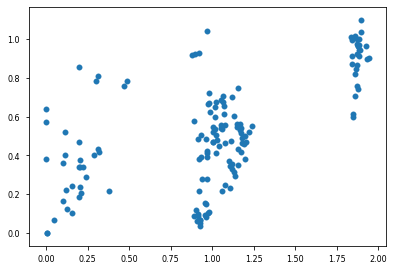

In [102]:
# correlation btw difference in sum_ipc and sum_dram
df_dynamic['error'] = np.abs(df_dynamic['sum_ipc'] - df_dynamic['ws'])
print('ipc error v.s. sum_dram', scipy.stats.pearsonr(df_dynamic['sum_dram'], df_dynamic['error']))
plt.scatter(df_dynamic['sum_dram'], df_dynamic['error'])
plt.show()

In [84]:
# Only show best performance for each benchmark pair
df_dynamic_show = df_dynamic.sort_values('ws', ascending=False).drop_duplicates(['1_bench','2_bench'])
df_dynamic_show.reset_index(inplace=True, drop=True)

col_dynamic_seq = ['1_bench', '2_bench', 
                   '1_intra', '2_intra', '1_l2', '2_l2', 
                   '1_sld', '1_infer', '2_sld', '2_infer', 'ws', 'fairness', 
                   'sum_ipc', 'diff_mflat', 'sum_dram',
                   # '1_norm_mflat', '2_norm_mflat'
                  ]
draw_table(df_dynamic_show, col_dynamic_seq, False)

,1_bench,2_bench,1_intra,2_intra,1_l2,2_l2,1_sld,1_infer,2_sld,2_infer,ws,fairness,sum_ipc,diff_mflat,sum_dram
0,parb_cutcp-0,rod_heartwall-0,2,1,0.5,0.5,0.991111,False,1.0072,False,1.99831,0.984026,2,0,0.0064182
1,parb_cutcp-0,parb_spmv-0,2,6,0.25,0.75,0.961125,False,1.01904,False,1.98017,0.943165,2.04622,258,0.924159
2,cut_sgemm-1,rod_heartwall-0,1,1,0.5,0.5,1.00999,False,0.90025,False,1.91024,0.891345,2.11616,461,0.211517
3,cut_wmma-0,parb_cutcp-0,2,2,0.75,0.25,0.979129,False,0.919238,False,1.89837,0.938832,1.96702,685,0.0465526
4,parb_cutcp-0,rod_hotspot3d-0,2,4,0.5,0.5,0.924292,False,0.937813,False,1.8621,0.985582,1.95809,317,0.911559
5,parb_cutcp-0,parb_stencil-0,2,3,0.5,0.5,0.938852,False,0.921244,False,1.8601,0.981245,1.94292,97,0.959431
6,cut_sgemm-1,parb_spmv-0,1,6,0.25,0.75,0.955459,False,0.875704,False,1.83116,0.916527,2.16055,190,1.11794
7,parb_cutcp-0,parb_lbm-0,2,3,0.75,0.25,0.910774,False,0.906506,False,1.81728,0.995314,1.9206,2425,0.972036
8,cut_sgemm-1,cut_wmma-0,1,2,0.25,0.75,0.983571,False,0.808275,False,1.79185,0.821776,2.08136,237,0.240332
9,cut_wmma-0,rod_heartwall-0,2,1,0.5,0.5,0.932546,False,0.848383,False,1.78093,0.909749,1.94625,863,0.0998656


# Pair w.r.t Intra Best (static)

In [40]:
gen_pair = os.path.join(SCRIPT_PATH, 'gen_tables/gen_table_pair.py')
baseline = 'intra'
baseline_pkl = os.path.join(PKL_PATH, 'intra_best.pkl')
output = os.path.join(PKL_PATH, 'pair_intra.pkl')

%run $gen_pair --output $output --baseline_pkl $baseline_pkl --baseline $baseline

In [41]:
df_pair_intra = pd.read_pickle(os.path.join(PKL_PATH, 'pair_intra.pkl'))
df_pair_intra.sort_values(['1_bench', '2_bench'], inplace=True)

col_pair_intra = ['1_bench', '2_bench', '1_sld', '2_sld', 'ws', 'fairness', '1_norm_mflat', '2_norm_mflat']
draw_table(df_pair_intra, col_pair_intra)

1_bench,2_bench,1_sld,2_sld,ws,fairness,1_norm_mflat,2_norm_mflat
cut_sgemm-1,parb_lbm-0,0.248507,0.979136,1.22764,0.253802,4.20325,0.979359
cut_sgemm-1,parb_spmv-0,0.862359,0.842012,1.70437,0.976405,1.3626,1.16471
cut_sgemm-1,parb_stencil-0,0.654807,0.807615,1.46242,0.810791,0.777236,1.11952
cut_wmma-0,parb_lbm-0,0.25546,0.931895,1.18735,0.274129,2.60079,1.14712
cut_wmma-0,parb_spmv-0,0.709239,0.495908,1.20515,0.699212,1.46706,1.69647
cut_wmma-0,parb_stencil-0,0.843482,0.466908,1.31039,0.553548,1.24877,2.35857
parb_cutcp-0,parb_lbm-0,0.648061,0.976747,1.62481,0.663489,11.8442,0.993412
parb_cutcp-0,parb_spmv-0,0.959922,0.975358,1.93528,0.984173,1.38961,1.01647
parb_cutcp-0,parb_stencil-0,0.938066,0.979544,1.91761,0.957656,1.15584,0.992032


# SMK w.r.t Seq

In [42]:
gen_pair = os.path.join(SCRIPT_PATH, 'gen_tables/gen_table_pair.py')
baseline = 'seq'
csv = os.path.join(HOME, 'data/csv/pair_smk.csv')
baseline_pkl = os.path.join(PKL_PATH, 'seq.pkl')
output = os.path.join(PKL_PATH, 'smk.pkl')

%run $gen_pair --csv $csv --output $output --baseline_pkl $baseline_pkl --baseline $baseline --smk

In [43]:
df_smk = pd.read_pickle(os.path.join(PKL_PATH, 'smk.pkl'))
df_smk.sort_values(['1_bench', '2_bench'], inplace=True)

col_smk = ['1_bench', '2_bench', '1_sld', '2_sld', 'ws', 'fairness', '1_norm_mflat', '2_norm_mflat']
draw_table(df_smk, col_smk)

1_bench,2_bench,1_sld,2_sld,ws,fairness,1_norm_mflat,2_norm_mflat
cut_sgemm-1,parb_lbm-0,0.180838,0.950202,1.13104,0.190316,7.11493,0.362547
cut_sgemm-1,parb_spmv-0,0.954379,0.948842,1.90322,0.994198,1.00967,0.738365
cut_sgemm-1,parb_stencil-0,0.663187,0.910176,1.57336,0.728636,0.996778,0.430431
cut_wmma-0,parb_lbm-0,0.124711,0.891608,1.01632,0.139872,7.17216,0.408079
cut_wmma-0,parb_spmv-0,0.624722,0.607166,1.23189,0.971898,1.91941,1
cut_wmma-0,parb_stencil-0,0.491898,0.671498,1.1634,0.732538,2.2149,0.713588
parb_cutcp-0,parb_lbm-0,0.309201,0.987677,1.29688,0.313059,67.3312,0.898802
parb_cutcp-0,parb_spmv-0,0.879459,0.992489,1.87195,0.886115,3.54545,0.992453
parb_cutcp-0,parb_stencil-0,0.802363,0.996123,1.79849,0.805485,6.04545,0.8869


In [5]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                    'num_wings': [2, 0, 0, 0],
                    'num_specimen_seen': [10, 2, 1, 8],
                    'type': ['falcon', 'dog', 'spider', 'fish']})
print(df)

   num_legs  num_wings  num_specimen_seen    type
0         2          2                 10  falcon
1         4          0                  2     dog
2         8          0                  1  spider
3         0          0                  8    fish
